<a href="https://colab.research.google.com/github/graciellavl/gen-media-template/blob/main/gen_media_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genmedia Template

### Setup

In [37]:
!pip install --upgrade google-genai
!pip install --upgrade --user google-cloud-aiplatform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: google-genai
    Found existing installation: google-genai 1.21.1
    Uninstalling google-genai-1.21.1:
      Successfully uninstalled google-genai-1.21.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 64.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [18]:
PROJECT_ID = "sst-tts-414810" # @param {type: "string"}
LOCATION = "us-central1" # @param {type: "string"}

#### Function

In [19]:
# Calling Gemini API

from google import genai
from google.genai import types
import base64

from google.colab import auth

# Authenticate with Google Colab
auth.authenticate_user()

def generate(REFINED_PROMPT):
  client = genai.Client(
      vertexai=True,
      project=PROJECT_ID,
      location=LOCATION,
  )


  model = "gemini-2.5-flash"
  contents = [
    types.Content(
      role="user",
      parts=[
        types.Part.from_text(text=REFINED_PROMPT)
      ]
    )
  ]

  generate_content_config = types.GenerateContentConfig(
    temperature = 1,
    top_p = 1,
    seed = 0,
    max_output_tokens = 65535,
    safety_settings = [types.SafetySetting(
      category="HARM_CATEGORY_HATE_SPEECH",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_DANGEROUS_CONTENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_HARASSMENT",
      threshold="OFF"
    )],
    thinking_config=types.ThinkingConfig(
      thinking_budget=-1,
    ),
  )
  response_text = ""
  for chunk in client.models.generate_content_stream(
    model = model,
    contents = contents,
    config = generate_content_config,
    ):
    response_text += chunk.text

  return response_text

In [20]:
# Display Image

import typing
import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)

In [21]:
# Calling Imagen Model

from vertexai.preview.vision_models import ImageGenerationModel
import vertexai

def generate_image(REFINED_PROMPT):
  vertexai.init(project=PROJECT_ID, location=LOCATION)

  generation_model = ImageGenerationModel.from_pretrained("imagen-4.0-generate-preview-06-06")

  images = generation_model.generate_images(
      prompt=REFINED_PROMPT,
      number_of_images=4,
      aspect_ratio="1:1",
      negative_prompt="",
      person_generation="allow_adult",
      safety_filter_level="block_few",
      add_watermark=True,
  )

  return images

### Customize your image generation prompt

In [26]:
USER_PROMPT = "skyscrapper" # @param {type:"string"}

REFINED_PROMPT =  """
Transform this prompt to create image in Ghibli style, incorporate information about the style in the prompt

Output format:
[Enhanced prompt]

Original User Prompt:
""" + USER_PROMPT


print(REFINED_PROMPT)


Transform this prompt to create image in Ghibli style, incorporate information about the style in the prompt

Output format:
[Enhanced prompt]

Original User Prompt:
skyscrapper


A majestic skyscraper, rendered in the distinctive Studio Ghibli style. Emphasize the hand-drawn animation aesthetic, soft watercolor textures, and a warm, inviting color palette. The lighting should be atmospheric and ethereal, perhaps a soft golden hour glow or a twilight ambience. Integrate whimsical details like overgrown greenery climbing the structure, unique, slightly fantastical architecture, and a sky filled with iconic, beautifully drawn cumulus clouds. The image should convey a sense of nostalgic wonder, serene beauty, and intricate detail, characteristic of Ghibli's environmental art.


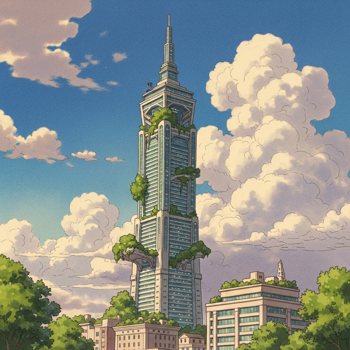

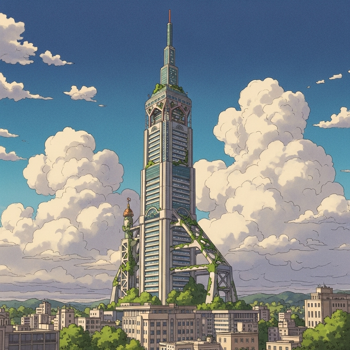

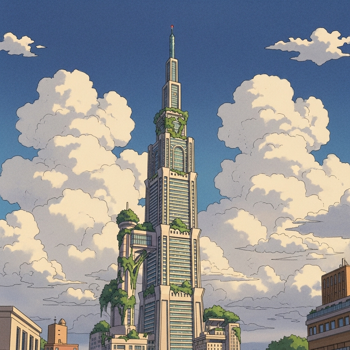

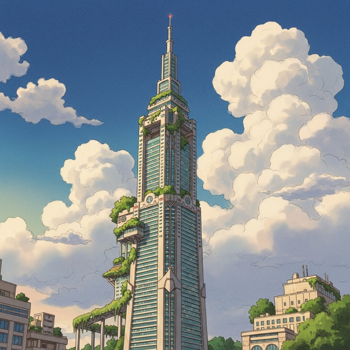

In [27]:
# Generate refined prompt
IMAGEN_REFINED_PROMPT = generate(REFINED_PROMPT)
print(IMAGEN_REFINED_PROMPT)

# Generate image
image = generate_image(IMAGEN_REFINED_PROMPT)

for item in image:
    display_image(item)